In [68]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import sklearn
import math
import seaborn as sns
from io import StringIO
import time
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
datafile="bank.csv"
df=pd.read_csv(datafile)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.shape

(11162, 17)

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
df.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [10]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [11]:
countNo = len(df[df.deposit == 'no'])
countYes = len(df[df.deposit == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(df.deposit))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(df.deposit))*100)))

Percentage of "No": 52.616%
Percentage of "Yes": 47.384%


In [12]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['deposit']= le.fit_transform(res_df['deposit'])
    res_df['job']= le.fit_transform(res_df['job'])
    res_df['marital']= le.fit_transform(res_df['marital'])
    res_df['education']= le.fit_transform(res_df['education'])
    res_df['default']= le.fit_transform(res_df['default'])
    res_df['housing']= le.fit_transform(res_df['housing'])
    res_df['loan']= le.fit_transform(res_df['loan'])
    res_df['month']= le.fit_transform(res_df['month'])
    res_df['poutcome']= le.fit_transform(res_df['poutcome'])
    return res_df

In [13]:
encoded_df=preprocessor(df)
encoded_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,unknown,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,unknown,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,unknown,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,unknown,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,unknown,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,cellular,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,unknown,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,cellular,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,cellular,8,8,9,2,172,5,0,0


In [14]:
encoded_df=encoded_df.drop(labels='contact', axis=1)
encoded_df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,8,8,9,2,172,5,0,0


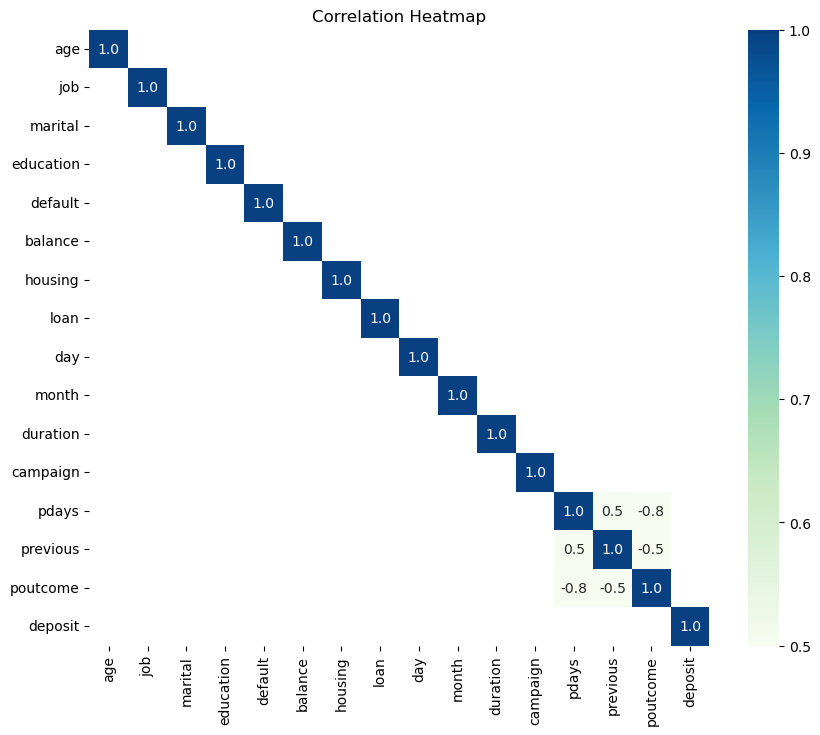

In [15]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = encoded_df.iloc[:, :].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

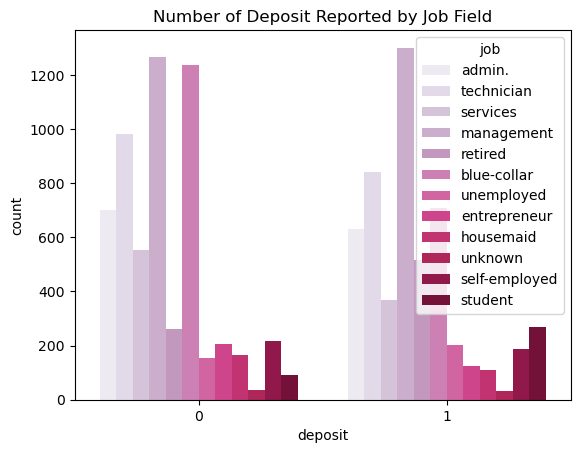

In [16]:
sns.countplot(x=encoded_df['deposit'],
              hue='job',
              data=df, palette = 'PuRd')
plt.title("Number of Deposit Reported by Job Field")
    
plt.show()

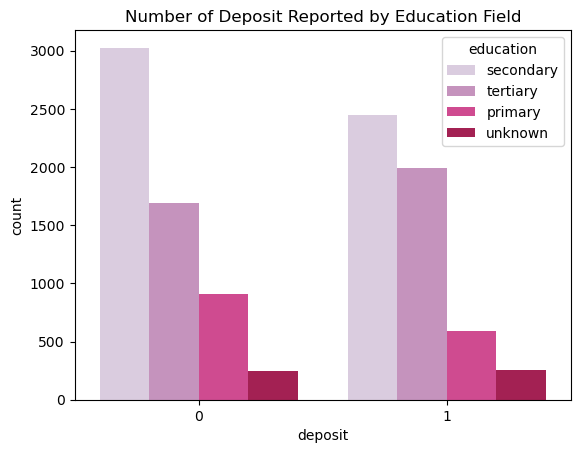

In [17]:
sns.countplot(x=encoded_df['deposit'],
              hue='education',
              data=df, palette = 'PuRd')
plt.title("Number of Deposit Reported by Education Field")
  
plt.show()

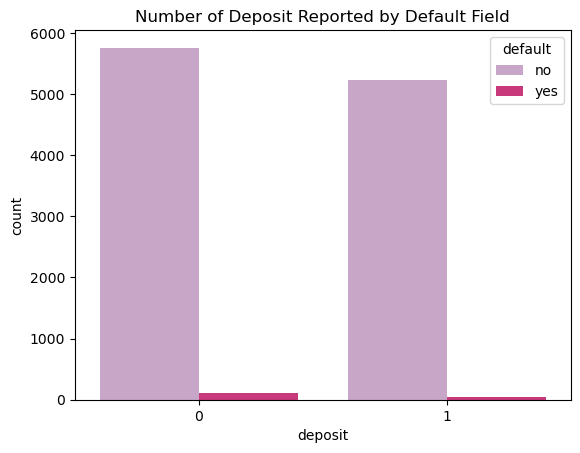

In [18]:
sns.countplot(x=encoded_df['deposit'],
              hue='default',
              data=df, palette = 'PuRd')
plt.title("Number of Deposit Reported by Default Field")
  
plt.show()

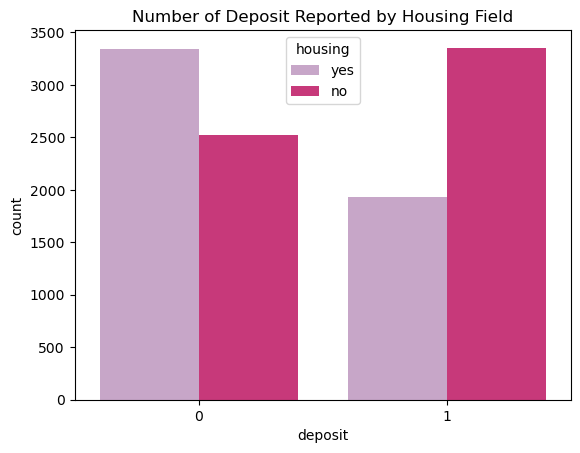

In [19]:
sns.countplot(x=encoded_df['deposit'],
              hue='housing',
              data=df, palette = 'PuRd')
plt.title("Number of Deposit Reported by Housing Field")
  
plt.show()

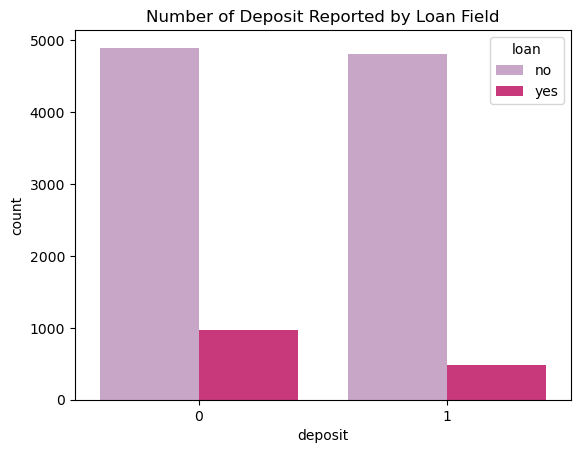

In [20]:
sns.countplot(x=encoded_df['deposit'],
              hue='loan',
              data=df, palette = 'PuRd')
plt.title("Number of Deposit Reported by Loan Field")
  
plt.show()

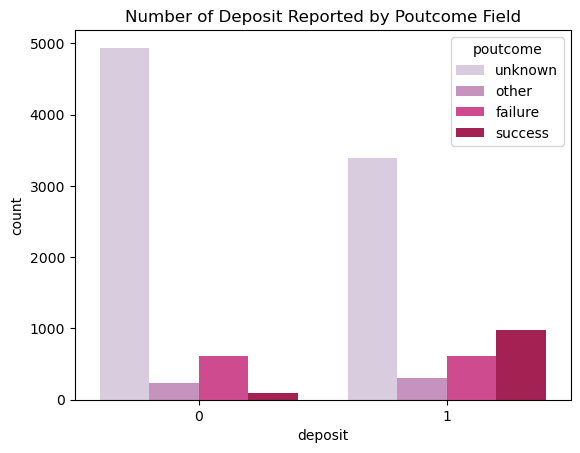

In [21]:
sns.countplot(x=encoded_df['deposit'],
              hue='poutcome',
              data=df, palette = 'PuRd')
plt.title("Number of Deposit Reported by Poutcome Field")
  
plt.show()

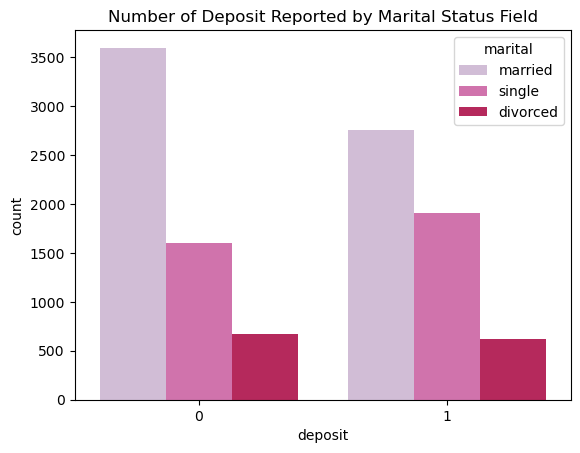

In [22]:
sns.countplot(x=encoded_df['deposit'],
              hue='marital',
              data=df, palette = 'PuRd')
plt.title("Number of Deposit Reported by Marital Status Field")
  
plt.show()

<AxesSubplot:xlabel='age', ylabel='balance'>

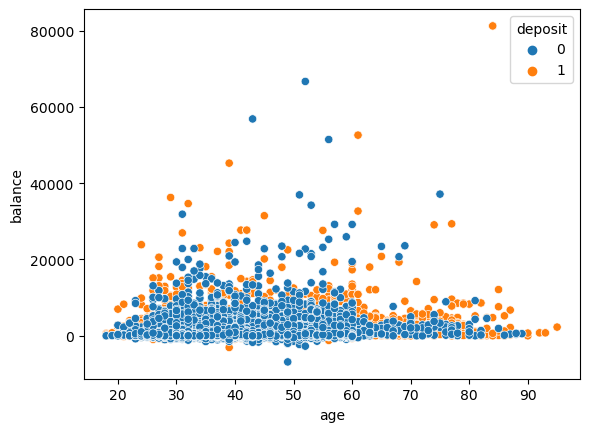

In [23]:
sns.scatterplot(x='age', y='balance',hue='deposit', data=encoded_df)

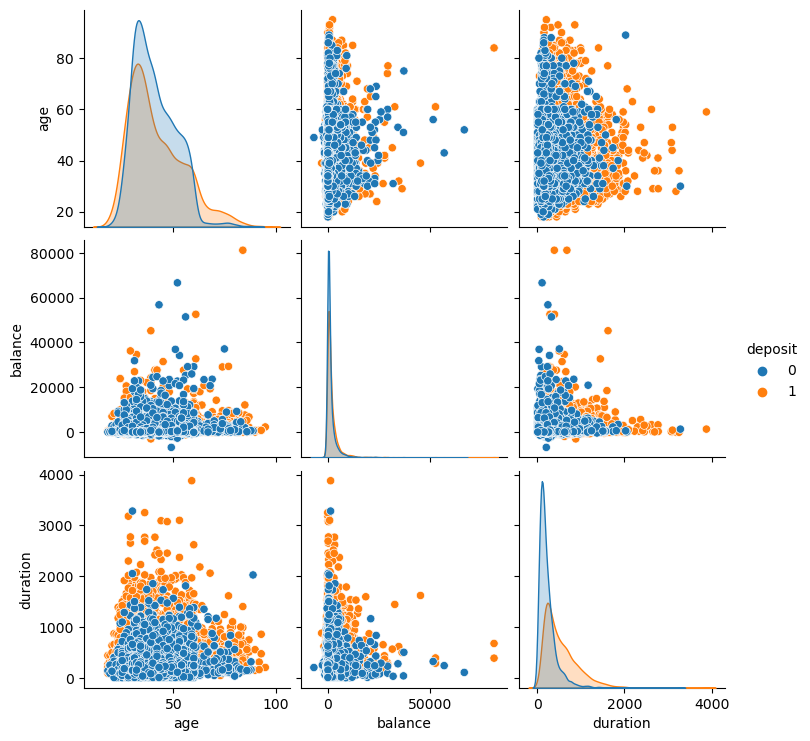

In [24]:
sns.pairplot(data=encoded_df, hue='deposit', vars= ['age', 'balance', 'duration'])

<AxesSubplot:>

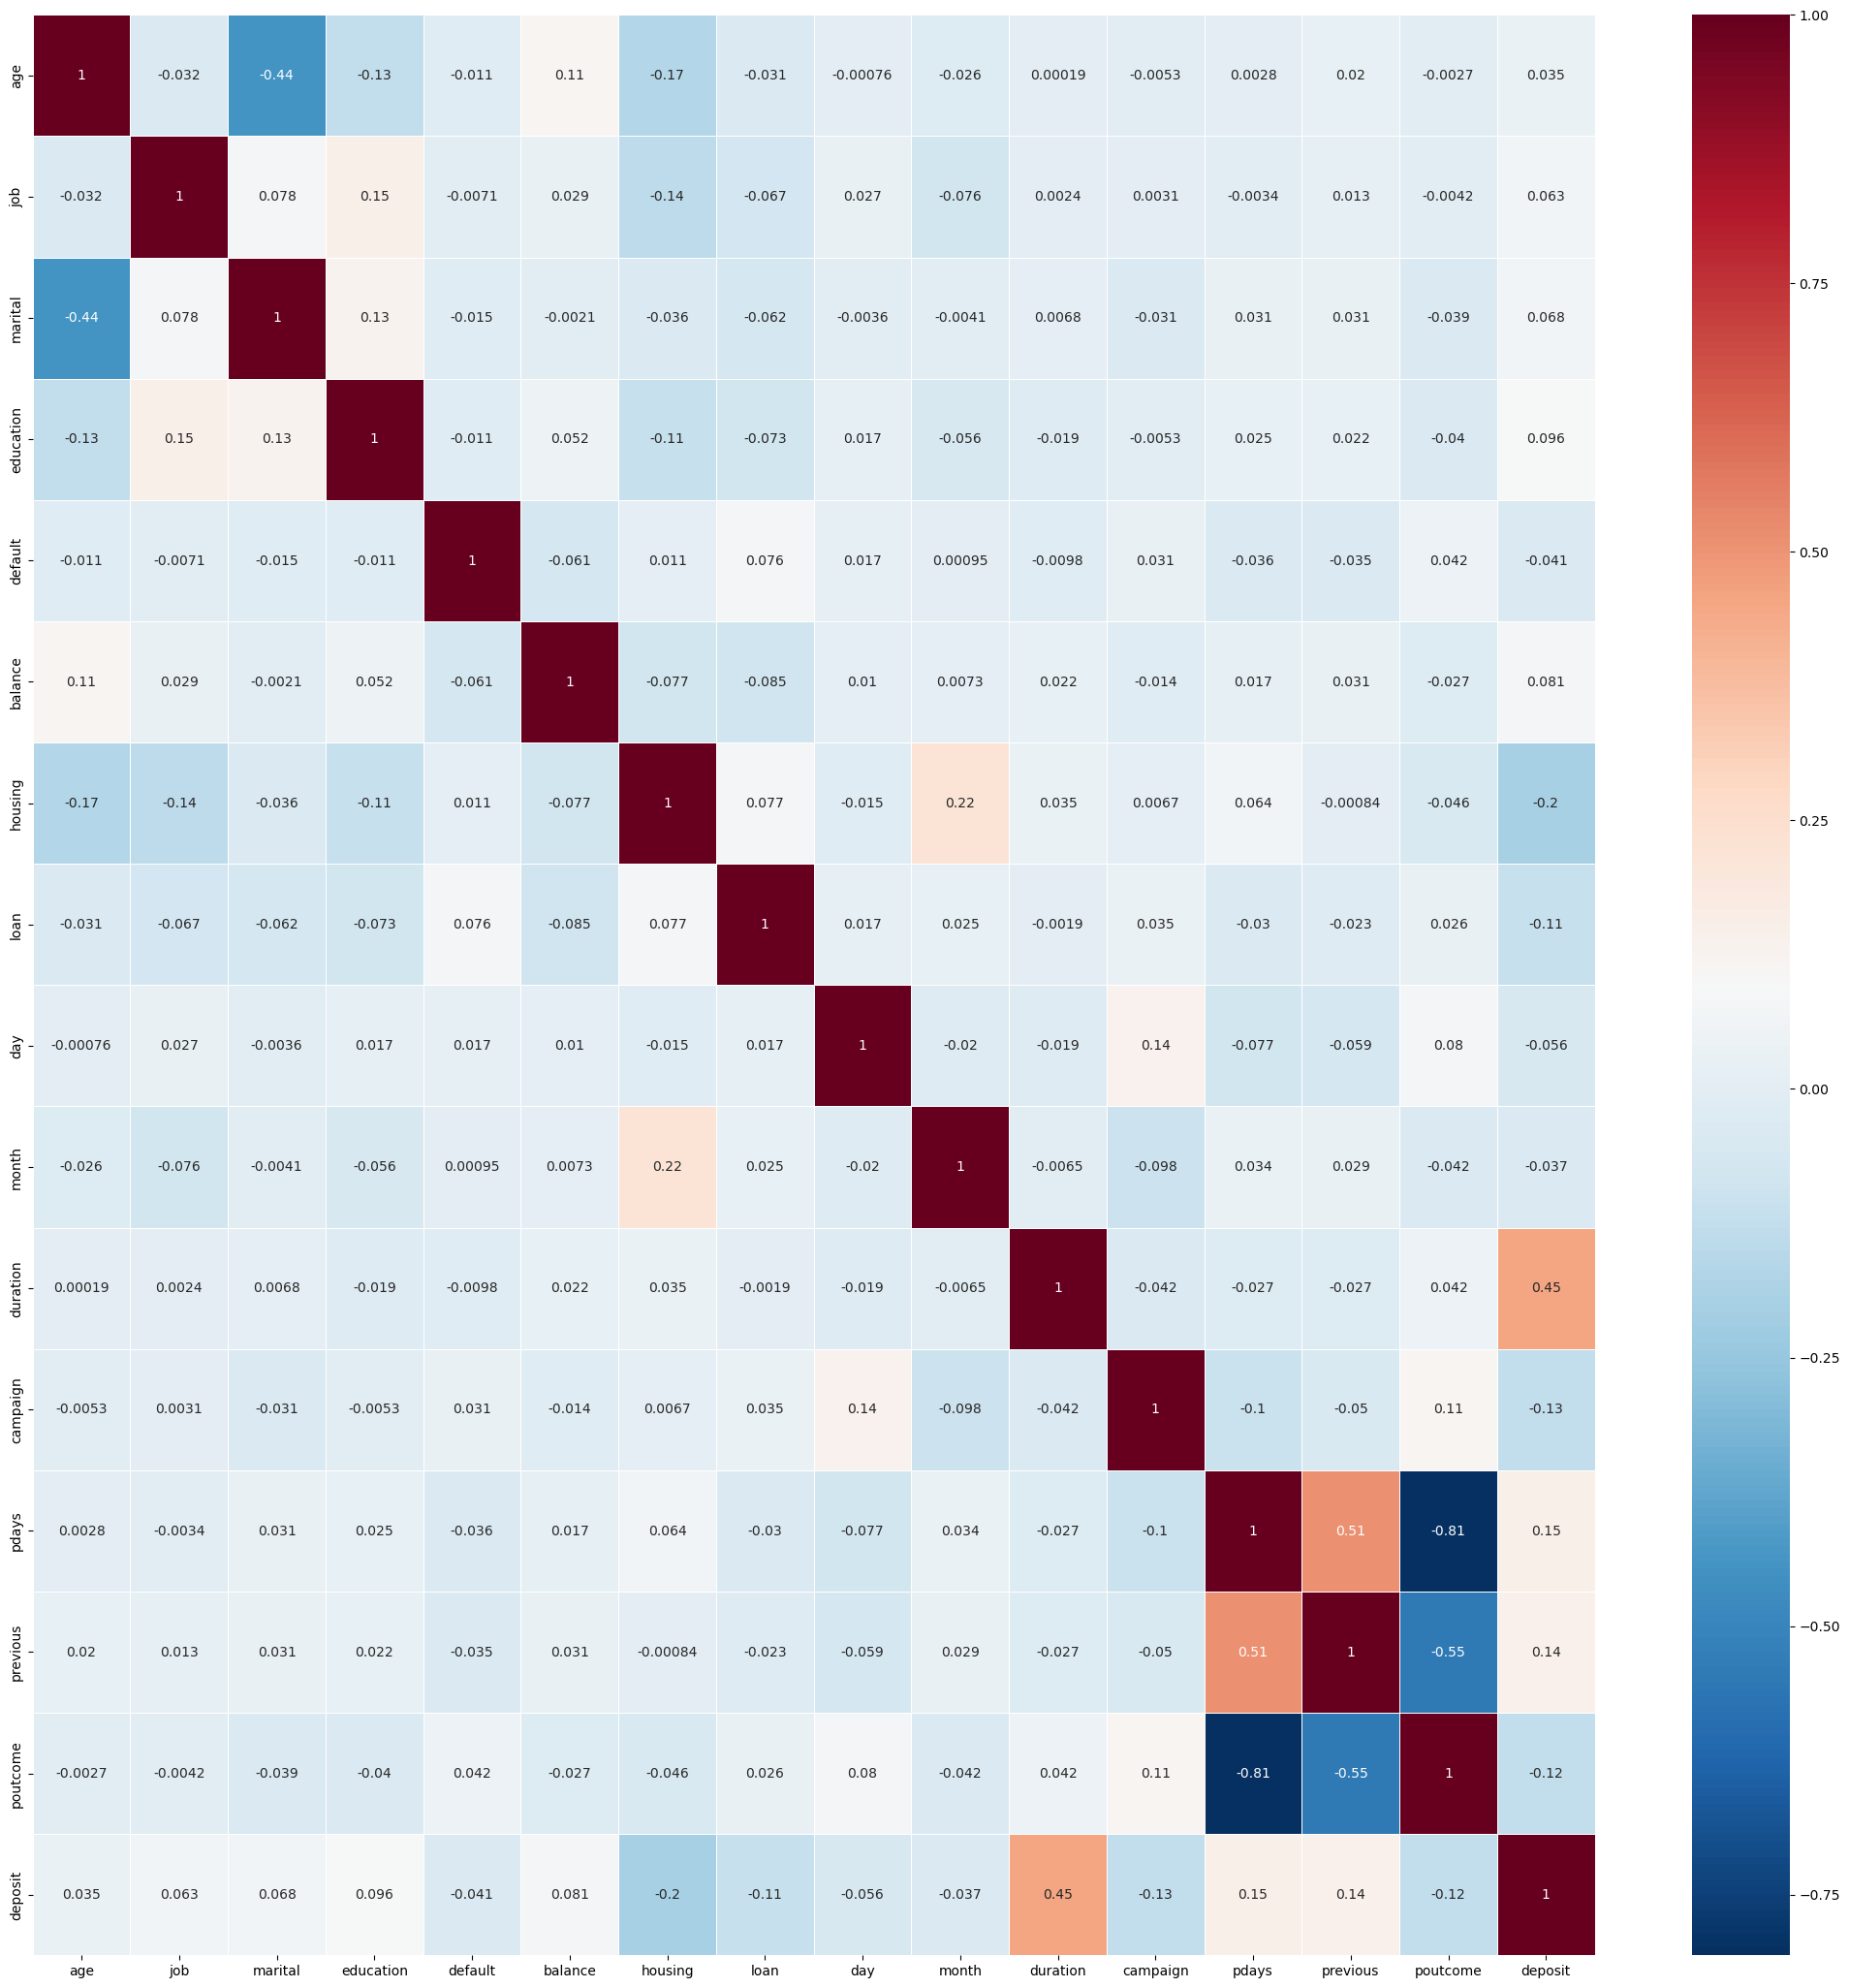

In [25]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = encoded_df.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [26]:
final_df=encoded_df
# Separating dataset into x & y, where y is the target variable

X= final_df.drop(['deposit'], axis=1).values
y= final_df['deposit'].values

<AxesSubplot:xlabel='deposit', ylabel='count'>

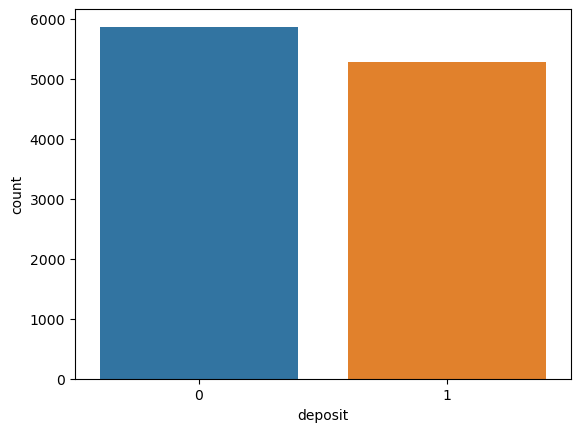

In [27]:
sns.countplot(x='deposit', data=final_df, label='Count')

C:\Users\Ekbal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

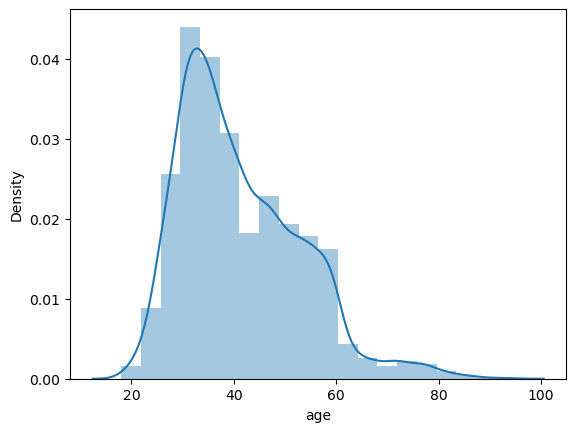

In [28]:
sns.distplot(final_df.age, bins = 20) 

C:\Users\Ekbal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

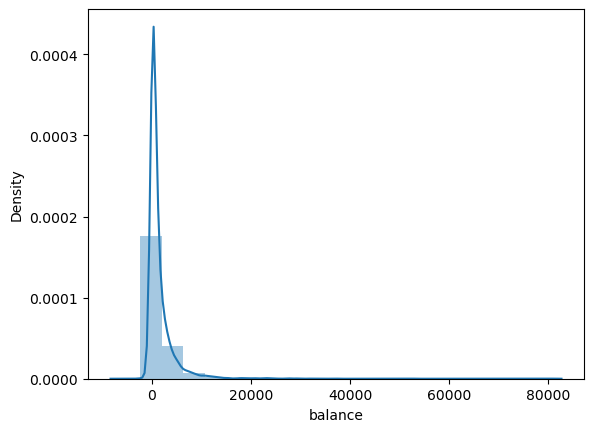

In [29]:
sns.distplot(encoded_df.balance, bins = 20) 

C:\Users\Ekbal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

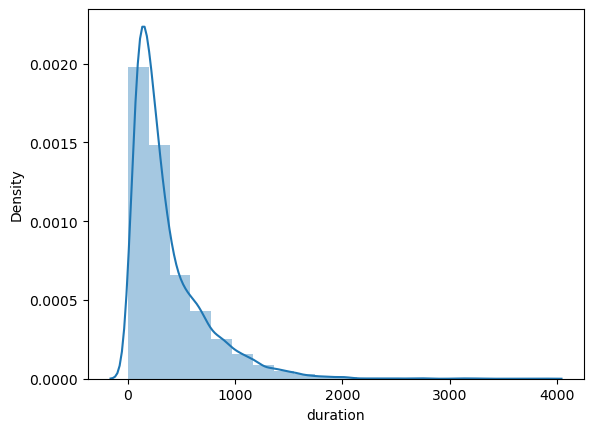

In [30]:
sns.distplot(final_df.duration, bins = 20) 

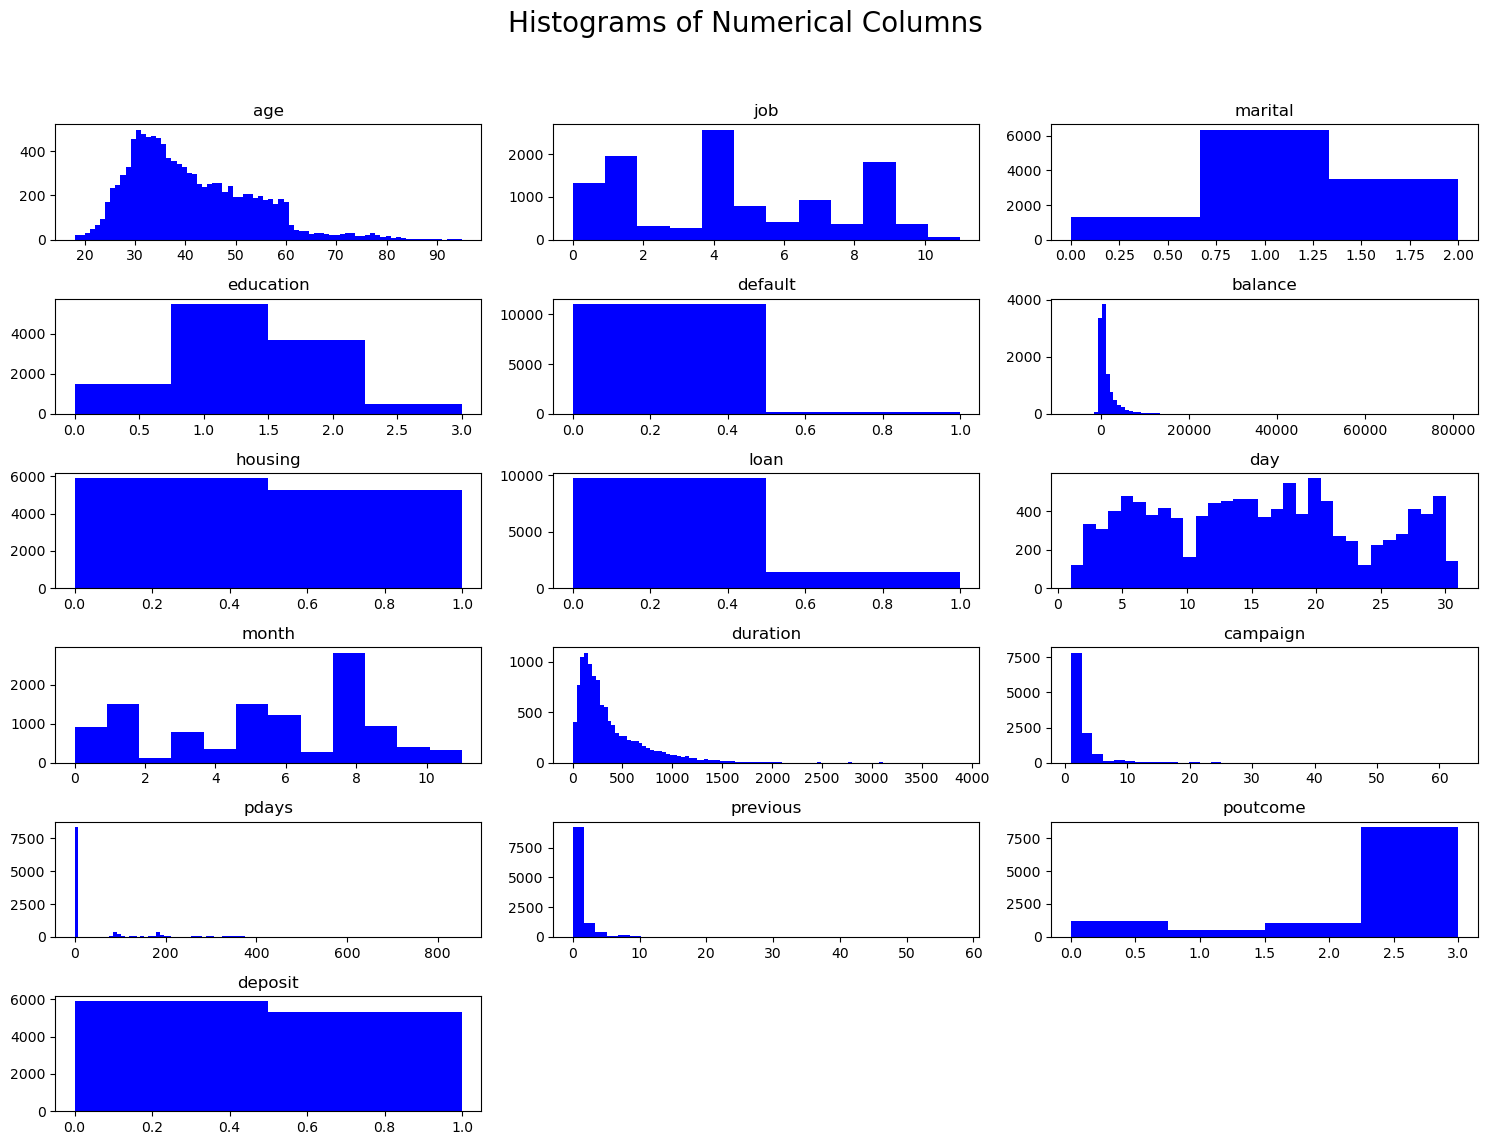

In [31]:
df2 = encoded_df
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='Blue')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [32]:
# Separating dataset into x & y, where y is the target variable

x= final_df.drop(['deposit'], axis=1).values
y= final_df['deposit'].values

In [33]:
# Split the data into train test

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [34]:
# Build the decision tree model
# Desicion tree using depth =2

model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2, min_samples_leaf=20, min_samples_split=200)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train, y_train)
print('Training score is:', model_dt_2_score_train)
model_dt_2.fit(x_test, y_test)
model_dt_2_score_test= model_dt_2.score(x_test, y_test)
print('Testing score is:', model_dt_2_score_test)

Training score is: 0.7123978049053645
Testing score is: 0.7254814151365876


In [35]:
# Build the decision tree model
# Desicion tree using depth =4

model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_leaf=40, min_samples_split=500)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train, y_train)
print('Training score is:', model_dt_2_score_train)
model_dt_2.fit(x_test, y_test)
model_dt_2_score_test= model_dt_2.score(x_test, y_test)
print('Testing score is:', model_dt_2_score_test)

Training score is: 0.7876581924067645
Testing score is: 0.7626511419614868


In [36]:
# Build the decision tree model
# Desicion tree using depth =6

model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_leaf=20, min_samples_split=100)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train, y_train)
print('Training score is:', model_dt_2_score_train)
model_dt_2.fit(x_test, y_test)
model_dt_2_score_test= model_dt_2.score(x_test, y_test)
print('Testing score is:', model_dt_2_score_test)

Training score is: 0.8156568484712734
Testing score is: 0.8159426780116436


In [37]:
# Build the decision tree model
# Desicion tree using depth =8

model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=8, min_samples_leaf=20, min_samples_split=50)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train, y_train)
print('Training score is:', model_dt_2_score_train)
model_dt_2.fit(x_test, y_test)
model_dt_2_score_test= model_dt_2.score(x_test, y_test)
print('Testing score is:', model_dt_2_score_test)

Training score is: 0.8276402732668832
Testing score is: 0.8235557545902373


In [38]:
# Build the decision tree model
# Desicion tree using depth =10

model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=10, min_samples_leaf=20, min_samples_split=450)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train, y_train)
print('Training score is:', model_dt_2_score_train)
model_dt_2.fit(x_test, y_test)
model_dt_2_score_test= model_dt_2.score(x_test, y_test)
print('Testing score is:', model_dt_2_score_test)

Training score is: 0.814536902228693
Testing score is: 0.7626511419614868


In [39]:
# Build the decision tree model
# Desicion tree using depth =12

model_dt_12 = DecisionTreeClassifier(random_state=1, max_depth=12, min_samples_leaf=20, min_samples_split=40)
model_dt_12.fit(x_train,y_train)
model_dt_12_score_train=model_dt_12.score(x_train, y_train)
print('Training score is:', model_dt_12_score_train)
model_dt_12.fit(x_test, y_test)
model_dt_12_score_test= model_dt_12.score(x_test, y_test)
print('Testing score is:', model_dt_12_score_test)

Training score is: 0.8425355582932019
Testing score is: 0.8343036274070756


In [40]:
# Build the decision tree model
# Desicion tree using depth =auto

model_dt_2 = DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=40)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train, y_train)
print('Training score is:', model_dt_2_score_train)
model_dt_2.fit(x_test, y_test)
model_dt_2_score_test= model_dt_2.score(x_test, y_test)
print('Testing score is:', model_dt_2_score_test)

Training score is: 0.8456714077724269
Testing score is: 0.8343036274070756


In [41]:
# Build the decision tree model
# Desicion tree using depth =12 & criterion='entropy'

model_dt_12 = DecisionTreeClassifier(random_state=1, max_depth=12, min_samples_leaf=20, min_samples_split=40, criterion='entropy')
model_dt_12.fit(x_train,y_train)
model_dt_12_score_train=model_dt_12.score(x_train, y_train)
print('Training score is:', model_dt_12_score_train)
model_dt_12.fit(x_test, y_test)
model_dt_12_score_test= model_dt_12.score(x_test, y_test)
print('Testing score is:', model_dt_12_score_test)

Training score is: 0.8456714077724269
Testing score is: 0.8334079713390058


In [42]:
# Decision Tree

model_dt= DecisionTreeClassifier(random_state=1, max_depth=12, min_samples_leaf=20, min_samples_split=40)
model_dt.fit(x_train, y_train)
y_pred_dt= model_dt_12.predict_proba(x_test)[:, 1]

In [43]:
#Performance matrix

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_dt

0.9243502833024976

In [44]:
predictions = model_dt.predict(x_test)
predictions

array([1, 0, 1, ..., 1, 0, 1])

In [45]:
y_actual_result = None
for i in range (len(predictions)):
    if (predictions[i]==1):
        y_actual_result= np.vstack((y_actual_result, y_test[i]))

In [46]:
#Recall

y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
    if (result==1):
        count = count+1
print('Ture yes| Predicted yes:')
print(count/float(len(y_actual_result)))

Ture yes| Predicted yes:
0.7951127819548872


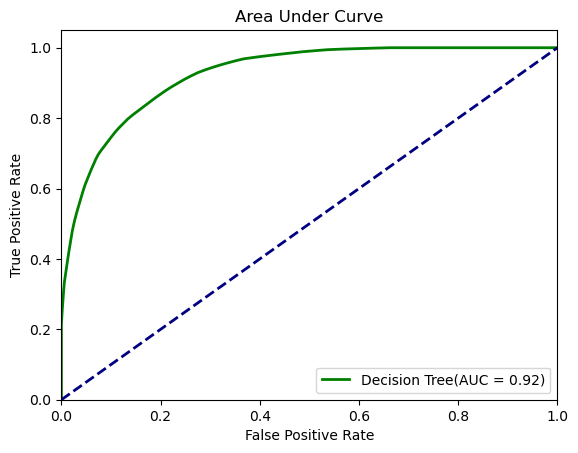

In [47]:
# Area under the Curve

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
#confusion matrix

print(confusion_matrix(y_test, predictions))

[[935 217]
 [235 846]]


In [49]:
accuracy_score(y_test, predictions)

0.7975817286162113

In [50]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

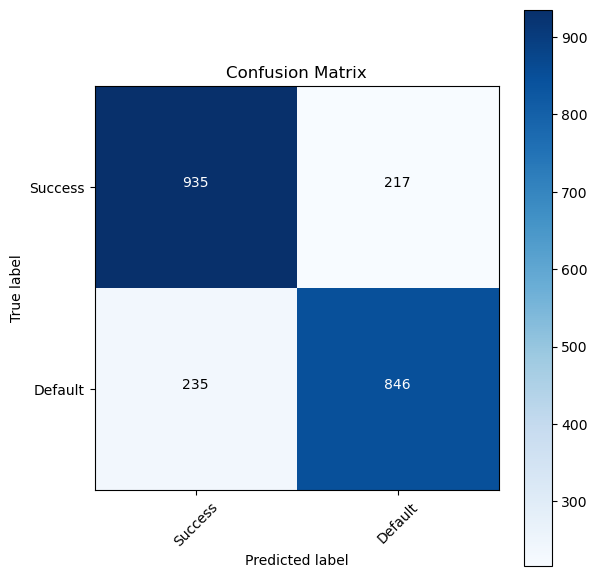

In [51]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

In [52]:
# Decision Tree using criterion='entropy'

model_dt= DecisionTreeClassifier(random_state=1, max_depth=12, min_samples_leaf=20, min_samples_split=40, criterion='entropy')
model_dt.fit(x_train, y_train)
y_pred_dt= model_dt_12.predict_proba(x_test)[:, 1]

In [53]:
fpr_dt1, tpr_dt1, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt1 = auc(fpr_dt1, tpr_dt1)

In [54]:
predictions1 = model_dt.predict(x_test)
predictions1

array([1, 0, 1, ..., 1, 0, 1])

In [55]:
y_actual_result1 = None
for i in range(len(predictions1)):
    if(predictions[i] == 1):
        y_actual_result1 = np.vstack((y_actual_result1, y_test[i]))

In [56]:
#Recall
y_actual_result1 = y_actual_result1.flatten()
count = 0
for result in y_actual_result1:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result1)))

true yes|predicted yes:
0.7951127819548872


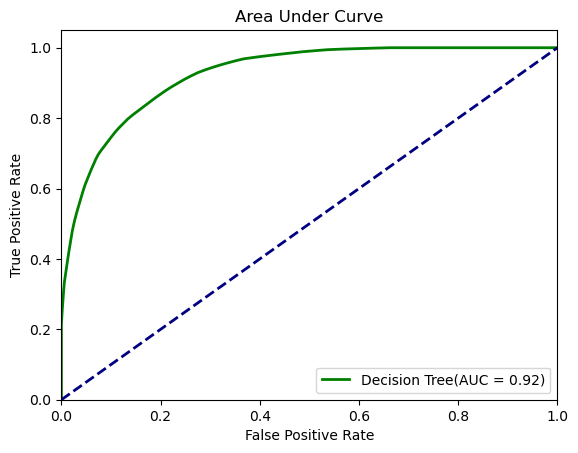

In [57]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt1, tpr_dt1, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [58]:
print (confusion_matrix(y_test, predictions1))

[[945 207]
 [235 846]]


In [59]:
accuracy_score(y_test, predictions1)

0.8020600089565607

In [60]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

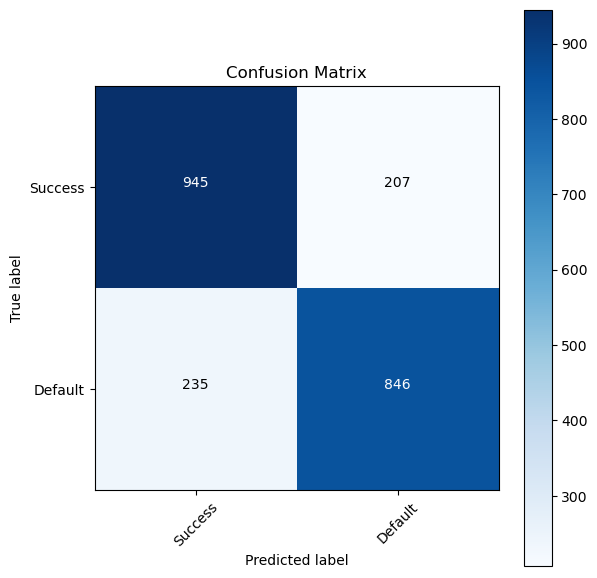

In [61]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions1, normalize=False)
plt.show()

In [71]:
# Hyper-Parameter Optimization using GridSearchCV

model_dt= DecisionTreeClassifier(random_state=12)
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,4,8,12],
             'min_samples_leaf': [20, 30, 40, 50,60], 
              'min_samples_split': [40, 50, 60, 70, 80, 100,200, 250, 300],
              'criterion': ['gini', 'entropy']
             }

cv_rf = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_test, y_test)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 200}
Time taken in grid search:  5.66


In [72]:
# Set best parameters given by grid search 

model_dt.set_params(max_depth=8, 
                    min_samples_leaf=20, 
                    min_samples_split=200, 
                    criterion='gini')

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, min_samples_split=200,
                       random_state=12)